Consider a physician who's workload is 30 patients per day. Unfortunately, because of no-shows, about 25% of patients fail to show up to their appointments leading to loss revenue for the physician. In this activity we will walk through the process of finding the ideal amount of patient bookings per day. First, use python to intuitively calculate how many patients the physician should book to stay busy if only 75% of scheduled patients show up.

In [2]:
#install scipy
!pip install scipy


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/af/25/caa430865749d504271757cafd24066d596217e83326155993980bc22f97/scipy-1.15.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/43.9 MB 10.9 MB/s eta 0:00:04
   - -------------------------------------- 1.2/43.9 MB 15.1 MB/s eta 0:00:03
   - -------------------------------------- 1.8/43.9 MB 14.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/43.9 MB 14.1 MB/s eta 0:00:03
   -- ------------------------------------- 2.6/43.9 MB 11.7 MB/s eta 0:00:04
   --- ----------------

In [3]:
#Import library
import scipy
from scipy.stats import binom

#Max number of patients per day 
workload = 30

#Percentage of patients that show up
prob = 0.75

#"x" is the answer
x = workload/prob
print(x)

40.0


Because we are using historical data to assume 25% of patients no-show, this is a binomial distribution model. Similarly to how we calculate the normal distribution's Cumulative density function and Probability density function, we do the same for this normal distribution. Firstwe fill in the x and probability values to display the normal distribution of the linearly calculated value we found in the previous step.

In [5]:
#Install matplotlib
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/cf/e382598f98be11bf51dd0bc60eca44a517f6793e3dc8b9d53634a144620c/matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a8/7e/cd93cab453720a5d6cb75588cc17dcdc08fc3484b9de98b885924ff61900/contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/42/d6/96dc2462006ffa16c8d475244e372abdc47d03a7bd38be0f29e7ae552af4/fonttools-4.55.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/103.3 kB ? eta -:--:--
     -------------- ---------------------- 41.0/103.3 kB 991.0 kB/s 

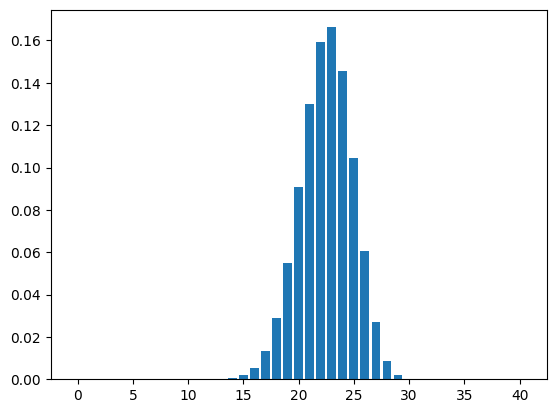

In [6]:
#Import libaries
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt

# set  the values of x and prob
x = 40
prob = 0.75
# defining list of r values
r_values = list(range(x + 1))

# generate the "dist" variable by calling the binom.pmf() function below. this will be the list of pmf values
dist= binom.pmf(r_values,30,0.75)

# Plotting the graph. 
plots = plt.bar(r_values, dist)
xy = []
for plot in plots:
    xy.append(plot.get_xy())
plt.show()

Next, we use Python's scipy.stats.binom package to get more insight of the situation. We find the cumulative density function to statistically calculate how much (in percent) will the physician be overbooked if we use the linear calculations from the first step to overbook patients.

In [7]:
#Fill in linear prediction
linearPrediction = 40
workload = 30
prob = 0.75
#Find the amount overworked by calculating 1 - cdf(). Set the output to a variable called "overworked"
z= binom.cdf(workload,40,prob)
overworked= 1-z
print(overworked)

0.439539731672533


Finally, we use the binomial ppf() function to what is the number of appointments the physician should book if she wants to limit the risk of having more than 30 appointments per day to 5%

In [8]:
#import binom object
from scipy.stats import binom

workload =30
prob = 0.75
#Target amount of overbooked patients
target = 0.05

# Set "total" = workload + ppf() -- hint: p = 1-prob

y= binom.ppf(0.05, 30, 0.25)
total= workload + y
print(total)

34.0


Conclusion
The physician should book 34 patients everyday to avoid having more than 30 appointments every day, which is the maximum workload this physican can handle. 